_Behavior of the Maximum Likelihood in Quantum State Tomography_ - Supplemental Notebook III
================================

Travis L Scholten and Robin Blume-Kohout, _Sandia National Labs_ and the _Center for Quantum Information and Control, University of New Mexico_

The purpose of this notebook is to provide a derivation of the asymptotic expressions for $\langle \lambda \rangle$, given in Equation (19) in our paper, which is available on the [arXiv](https://arxiv.org/abs/1609.04385).

This notebook requires installing ``sympy``, ``matplotlib``, ``numpy``, ``pandas``, ``sympy``, and ``seaborn``. If you don't want to install seaborn, then that's OK - the color schemes and formatting will just look a little bit different!

If you've arrived at this notebook by cloning the [GitHub repository for this paper](https://github.com/Travis-S/2016_MaxLik_Tomography), the data files referenced are located in the `Data` directory.

In [2]:
#Preliminary code imports
from __future__ import division
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

#Enable pretty-printing of sympy output
sympy.init_printing(False)

Setting the Scene
===========

To derive asymptotic expressions, we'll need the equation for $z$ (Equation 16):
$$z = 2 \sqrt{n}\left(1-\frac{x}{2} + \frac{x^{2}}{10} - \frac{x^{3}}{200}\right)$$

where $x = \left(\frac{15 \pi r}{2n}\right)^{2/5}$ and $n = d-r$, and our expression for $\langle \lambda \rangle$ (Equation 19):

$$\langle \lambda\rangle \approx 2rd - r^{2}+rz^{2} + \frac{n(n+z^{2})}{\pi}\left(\frac{\pi}{2} - \sin^{-1}\left(\frac{z}{2\sqrt{n}}\right)\right)  - \frac{z(z^{2}+26n)}{24\pi}\sqrt{4n-z^{2}}.$$

**Simplifying the Expression**

Let's simplify the above expression by defining a function $g(x)$ so that $z = 2\sqrt{n}g(x)$. In terms of $g$, $\langle \lambda \rangle$ takes the form

$$\begin{align*}
\langle \lambda \rangle &=2rd - r^{2} + 4nrg^{2} + \frac{n(n+4ng^{2})}{\pi}\left(\frac{\pi}{2}-\sin^{-1}(g)\right) - \frac{g2\sqrt{n}(4ng^{2}+26n)}{24\pi}\sqrt{4n - 4ng^{2}}\\
&=2rd - r^{2} + 4nrg^{2} + \frac{n^{2}(1+4g^{2})}{\pi}\left(\frac{\pi}{2}-\sin^{-1}(g)\right) - \frac{gn^{2}(2g^{2}+13)}{3\pi}\sqrt{1 - g^{2}}\\
\end{align*}$$.

Now, we can make various asymptotic approximations to $g$. To compare our expressions to numerical results, we introduce a helper function.

In [3]:
#Load the data file.
df = pd.read_csv('Data/iso_quantum_llrs_sim_totals.csv')
df = df[df['dimRec'] <= 50].drop(['numTrials'], axis=1)
ranks = df['rankTrue'].unique()


df = df.append(pd.read_csv('Data/temp.csv'))
df = df.append(pd.read_csv('Data/temp2.csv'))
df = df.append(pd.read_csv('Data/temp3.csv'))
df = df.append(pd.read_csv('Data/temp4.csv'))

In [4]:
df.head()

,dimRec,llrs,rankTrue
0,2.0,2.412765,1.0
1,2.0,2.829306,2.0
2,3.0,5.501882,1.0
3,3.0,7.423551,2.0
4,3.0,7.988628,3.0


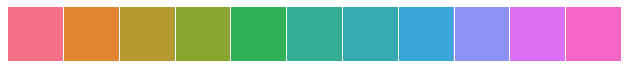

In [5]:
try:
    colors2 = sns.color_palette('husl', n_colors=len(ranks) + 1)
    sns.palplot(colors2)
    
except Exception:
    colors2 = cm.viridis(np.linspace(0, 1, len(ranks) + 1))

In [30]:
def theory_comp_plot(theory, ax, title=''):
    counter  = 1

    for r in ranks:
        X = df[df['rankTrue'] == r]['dimRec'].values
        Y = df[df['rankTrue'] == r]['llrs'].values

        ax.plot(X, Y, clip_on=False, ls='', color=colors2[counter],\
                marker='o', markersize=10 , alpha=1)

        Z = map(lambda d: theory(d, r), X)
        ax.plot(X, Z, clip_on=False, ls='-', color=colors2[counter],\
                marker='')

        counter += 1
    ax.plot([], [], marker='o', ls='', color='black', label='Numerical Data')
    ax.plot([], [], marker='', ls='-' ,color='black', label='Theory')
    
    ax.legend(loc=0, fontsize=15, frameon=True, fancybox=True, edgecolor='black')
    ax.set_xlabel('Hilbert Space Dimension $d$', fontsize=20)
    ax.set_ylabel(r'$\langle \lambda \rangle$', fontsize=20, rotation=0, labelpad=25)
    for s in ['x', 'y']: ax.tick_params(axis=s, labelsize=15)
    ax.set_title(title, fontsize=15)
    plt.show()

In [10]:
def theory0(d, r):
    if d != r:
        n = d-r
        x = (15 * np.pi * r/(2*n))**(2/5)

        g = 1 - x/2 + (x**2)/10 - (x**3)/200

        t1 = 2*r*d - r ** 2 + 4*n*r*g**2
        t2 = (n**2)*(1+4*g**2)/np.pi*(np.pi/2 - np.arcsin(g))
        t3 = -1 * n**2 * g*(2*g**2+13)/(3*np.pi)*np.sqrt(1-g**2)
    
        v = t1+t2+t3
    else:
        v = np.nan
    return v

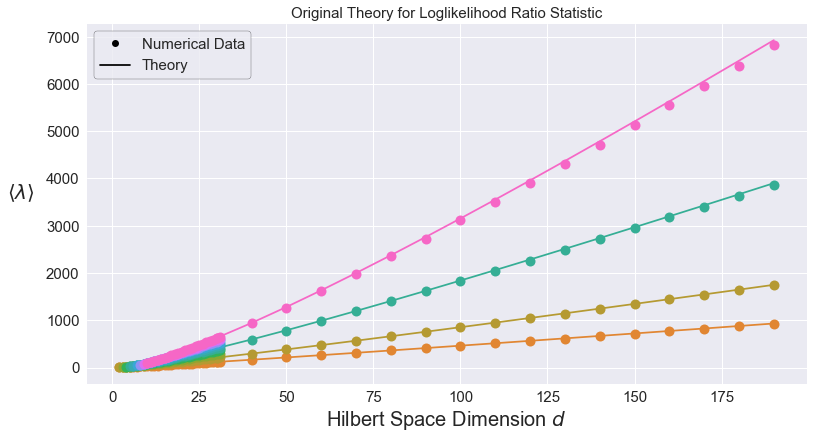

In [31]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

theory_comp_plot(theory0, ax, title='Original Theory for Loglikelihood Ratio Statistic')

Let's try to simply fit a line to the numerical data.

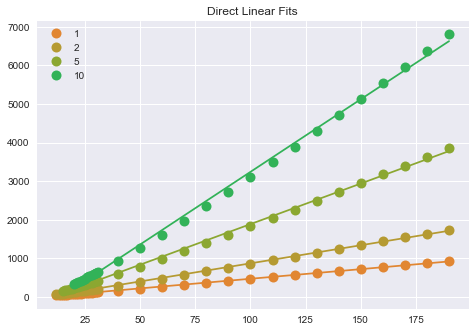

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counter  = 1

rs =[1,2,5,10]
for r in rs:
    X = df[df['rankTrue'] == r]['dimRec'].values[10:]
    Y = df[df['rankTrue'] == r]['llrs'].values[10:]

    ax.plot(X, Y, clip_on=False, ls='', color=colors2[counter],\
            marker='o', markersize=10 , alpha=1, label=r)

    p = np.polyfit(X,Y,1)
    Z = np.polyval(p, X)
    ax.plot(X, Z, clip_on=False, ls='-', color=colors2[counter],\
            marker='', markersize=10 , alpha=1)
    
    counter += 1
ax.legend(loc=0)
ax.set_title('Direct Linear Fits')

In [33]:
m = []
b = []
for r in rs:
    X = df[df['rankTrue'] == r]['dimRec'].values[10:]
    Y = df[df['rankTrue'] == r]['llrs'].values[10:]


    p = np.polyfit(X,Y,1)
    m.append(p[0])
    b.append(p[1])

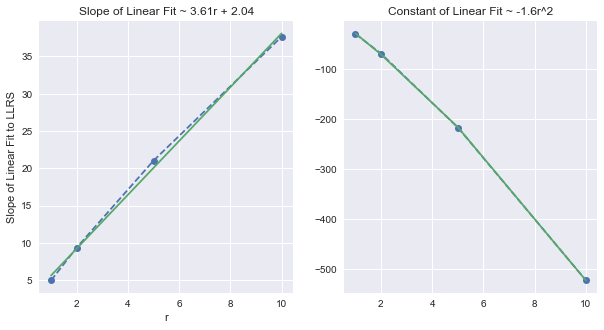

In [34]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(rs, m, ls='--', marker='o')
f1 = np.polyfit(rs, m, 1)
ax.plot(rs, np.polyval(f1, rs))
ax.set_title('Slope of Linear Fit ~ {0}r + {1}'.format(np.round(f1[0], 2), np.round(f1[1], 2)))
ax.set_xlabel('r')
ax.set_ylabel('Slope of Linear Fit to LLRS')

ax = fig.add_subplot(1, 2, 2)
ax.plot(rs, b, ls='--', marker='o')
f2 = np.polyfit(rs, b, 2)
ax.plot(rs, np.polyval(f2, rs))
ax.set_title('Constant of Linear Fit ~ {0}r^{1}'.format(np.round(f2[0], 2), 2))

#plt.plot(rs, np.polyval(np.polyfit([1,2,3], m, 2), [1,2,3]))

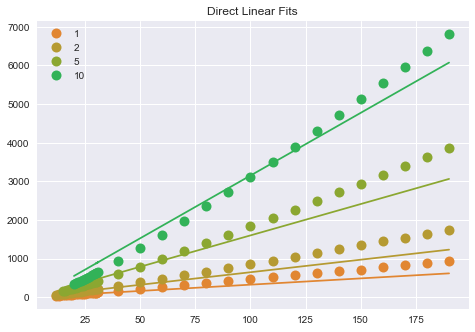

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counter  = 1

rs =[1,2,5,10]
for r in rs:
    X = df[df['rankTrue'] == r]['dimRec'].values[10:]
    Y = df[df['rankTrue'] == r]['llrs'].values[10:]

    ax.plot(X, Y, clip_on=False, ls='', color=colors2[counter],\
            marker='o', markersize=10 , alpha=1, label=r)


    Z = 3.25*r*X - r**2
    ax.plot(X, Z, clip_on=False, ls='-', color=colors2[counter],\
            marker='', markersize=10 , alpha=1)
    
    counter += 1
ax.legend(loc=0)
ax.set_title('Direct Linear Fits')

Approximation 1: $d\rightarrow \infty; r = o(d)$
============

Let's assume that $r$ is a fixed constant, and take $d \rightarrow \infty$. Consequently, $x \rightarrow 0$.

**Lowest Order: $g=1$**

To lowest order, the simplest approximation we could make for $g$ is that $g = 1$. Plugging this in to our expression for $\langle \lambda \rangle$ above yields

$$\begin{align*}
\langle \lambda \rangle &=2rd - r^{2} + 4nr = 2rd - r^{2} + 4r(d-r)\\
&= 2rd + 4rd - r^{2}-4r^{2}\\
&= 6rd - 5r^{2}\\
\end{align*}$$.

How does this theory do?

In [36]:
def theory1(d, r):
    if d != r:
        n = d-r
        x = (15 * np.pi * r/(2*n))**(2/5)

        #Explicitly set g to be 1
        g = 1

        t1 = 2*r*d - r ** 2 + 4*n*r*g**2
        t2 = (n**2)*(1+4*g**2)/np.pi*(np.pi/2 - np.arcsin(g))
        t3 = -1 * n**2 * g*(2*g**2+13)/(3*np.pi)*np.sqrt(1-g**2)
    
        #v = t1+t2+t3
        
        v = (3*r + 2.25)*d-1*r**2
    else:
        v = np.nan
    return v

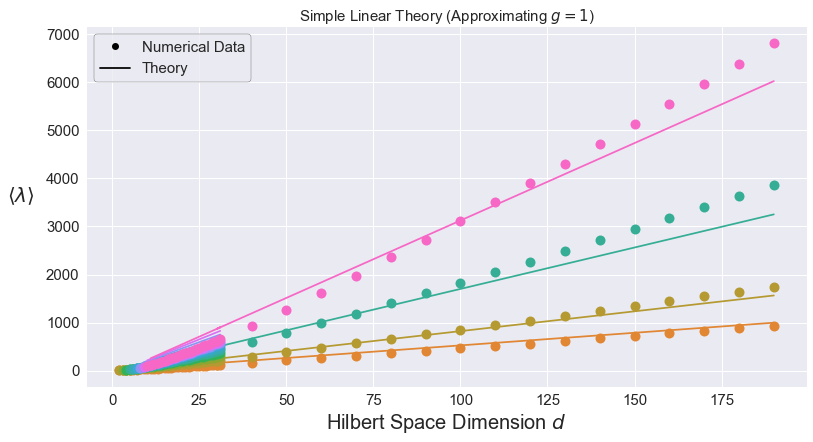

In [42]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

theory_comp_plot(theory1, ax, 'Simple Linear Theory (Approximating $g=1$)')

This theory appears to go from over to under-estimating $\langle \lambda \rangle$. This means we need to go to a higher order in the expression for $g(x)$. To guide our analysis, let's examine what happens when more terms are added to $g$.

In [39]:
def theory2(d, r):
    if d != r:
        n = d-r
        x = (15 * np.pi * r/(2*n))**(2/5)

        #Approximate g by 1-x/2
        g = 1 - x/2

        t1 = 2*r*d - r ** 2 + 4*n*r*g**2
        t2 = (n**2)*(1+4*g**2)/np.pi*(np.pi/2 - np.arcsin(g))
        t3 = -1 * n**2 * g*(2*g**2+13)/(3*np.pi)*np.sqrt(1-g**2)
    
        v = t1+t2+t3
    else:
        v = np.nan
    return v

/Users/tlschol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in arcsin
/Users/tlschol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


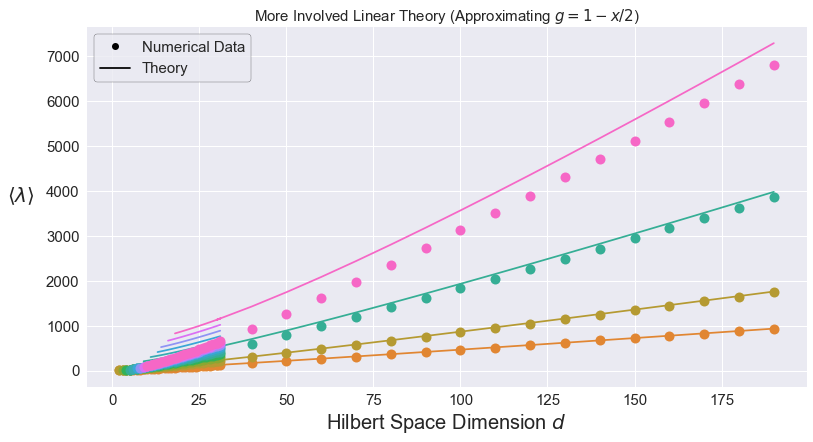

In [41]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

theory_comp_plot(theory2, ax, 'More Involved Linear Theory (Approximating $g=1-x/2$)')

Taking $g = 1-x/2$ seems to be reasonable. Under this approximation:

$$\begin{align*}
\langle \lambda \rangle &\approx 2rd - r^{2} + 4nr\left(1-\frac{x}{2}\right)^{2} + \frac{n^{2}(1+4\left(1-\frac{x}{2}\right)^{2})}{\pi}\left(\frac{\pi}{2}-\sin^{-1}\left(1-\frac{x}{2}\right)\right) - \frac{\left(1-\frac{x}{2}\right)n^{2}(2\left(1-\frac{x}{2}\right)^{2}+13)}{3\pi}\sqrt{1 - \left(1-\frac{x}{2}\right)^{2}}\\
\end{align*}$$.

The next approximation we make is to expand $\sin^{-1}$ in a Taylor series:

$$\sin^{-1}(1-y)\approx \frac{\pi}{2} - \sqrt{2y}~~~~y<<1$$

Asymptotically, $x \rightarrow 0$, so $1-x/2<< 1$. Letting $y = x/2$, we have


$$\sin^{-1}\left(1-\frac{x}{2}\right)\approx \frac{\pi}{2} - \sqrt{x}~~~~x<<1$$

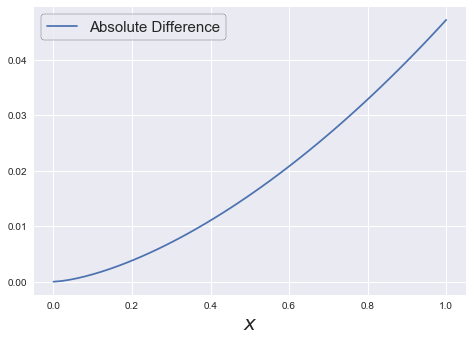

In [16]:
x = np.linspace(0, 1)

y = np.arcsin(1-x/2)
z = np.pi/2 - np.sqrt(x)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(x, np.abs(y - z), ls='-', marker='', label='Absolute Difference')

ax.set_xlabel('$x$', fontsize=20)

ax.legend(loc=0, fontsize=15, frameon=True, fancybox=True, edgecolor='black')

In [17]:
def theory3(d, r):
    if d != r:
        n = d-r
        x = (15 * np.pi * r/(2*n))**(2/5)

        #Approximate g by 1-x/2 + x**2/10
        g = 1 - x/2

        t1 = 2*r*d - r ** 2 + 4*n*r*g**2
        t2 = (n**2)*(1+4*g**2)/np.pi*np.sqrt(x)
        t3 = -1 * n**2 * g*(2*g**2+13)/(3*np.pi)*np.sqrt(1-g**2)
    
        v = t1+t2+t3
    else:
        v = np.nan
    return v

/Users/tlschol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


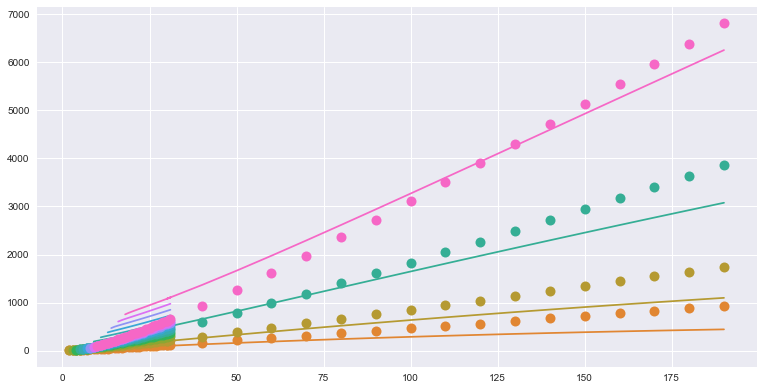

In [18]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

theory_comp_plot(theory3, ax)

Using that approximation to $\sin^{-1}(1-x/2)$ yields
$$\begin{align*}
\langle \lambda \rangle &\approx 2rd - r^{2} + 4nr\left(1-\frac{x}{2}\right)^{2} + \frac{n^{2}(1+4\left(1-\frac{x}{2}\right)^{2})\sqrt{x}}{\pi} - \frac{\left(1-\frac{x}{2}\right)n^{2}(2\left(1-\frac{x}{2}\right)^{2}+13)}{3\pi}\sqrt{1 - \left(1-\frac{x}{2}\right)^{2}}\\
&= 2rd - r^{2} + 4nr\left(1-\frac{x}{2}\right)^{2} + \frac{n^{2}(1+4\left(1-\frac{x}{2}\right)^{2})\sqrt{x}}{\pi} - \frac{\left(1-\frac{x}{2}\right)n^{2}(2\left(1-\frac{x}{2}\right)^{2}+13)}{3\pi}\sqrt{x}\sqrt{1-x/4}\\
&= 2rd - r^{2} + 4nr\left(1-\frac{x}{2}\right)^{2} +\frac{n^{2}\sqrt{x}}{\pi}\left[(1+4\left(1-\frac{x}{2}\right)^{2}) - \frac{\left(1-\frac{x}{2}\right)(2\left(1-\frac{x}{2}\right)^{2}+13)}{3}\sqrt{1-x/4}\right]\\
\end{align*}$$.

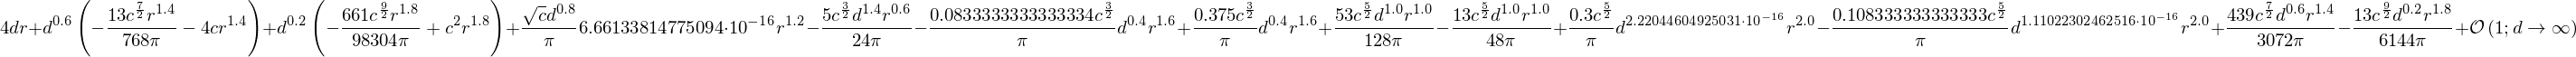

In [19]:
x,g,r,n,c,d = sympy.symbols('x,g,r,n,c,d', positive=True, real=True)

#Declare the two terms inside the brackets
t1 = (1+ 4*g**2)
t2 = -1*g*(2*g**2+13)/3*sympy.sqrt(1-x/4)
t3 = 4*n*r*g**2
#Substitute in g and expand
S = sympy.expand(t3 + (n**2/sympy.pi)*sympy.sqrt(x)*(t1+t2)).subs({g: 1-x/2}).subs({x:c*(r/n)**(2/5)})

sympy.init_printing(True)
S2 = sympy.series(S.subs({n:d-r}), d, x0=sympy.oo, n=0)
S2

In [20]:
print(sympy.latex(S2))

4 d r + d^{0.6} \left(- \frac{13 c^{\frac{7}{2}} r^{1.4}}{768 \pi} - 4 c r^{1.4}\right) + d^{0.2} \left(- \frac{661 c^{\frac{9}{2}} r^{1.8}}{98304 \pi} + c^{2} r^{1.8}\right) + \frac{\sqrt{c} d^{0.8}}{\pi} 6.66133814775094 \cdot 10^{-16} r^{1.2} - \frac{5 c^{\frac{3}{2}} d^{1.4} r^{0.6}}{24 \pi} - \frac{0.0833333333333334 c^{\frac{3}{2}}}{\pi} d^{0.4} r^{1.6} + \frac{0.375 c^{\frac{3}{2}}}{\pi} d^{0.4} r^{1.6} + \frac{53 c^{\frac{5}{2}} d^{1.0} r^{1.0}}{128 \pi} - \frac{13 c^{\frac{5}{2}} d^{1.0} r^{1.0}}{48 \pi} + \frac{0.3 c^{\frac{5}{2}}}{\pi} d^{2.22044604925031 \cdot 10^{-16}} r^{2.0} - \frac{0.108333333333333 c^{\frac{5}{2}}}{\pi} d^{1.11022302462516 \cdot 10^{-16}} r^{2.0} + \frac{439 c^{\frac{7}{2}} d^{0.6} r^{1.4}}{3072 \pi} - \frac{13 c^{\frac{9}{2}} d^{0.2} r^{1.8}}{6144 \pi} + \mathcal{O}\left(1; d\rightarrow\infty\right)


$$\begin{align*}
\langle \lambda \rangle &\approx 4 d r  + \frac{53 c^{\frac{5}{2}} d^{1.0} r^{1.0}}{128 \pi} - \frac{13 c^{\frac{5}{2}} d^{1.0} r^{1.0}}{48 \pi} + \frac{0.3 c^{\frac{5}{2}}}{\pi} r^{2.0} - \frac{0.108333333333333 c^{\frac{5}{2}}}{\pi} r^{2.0}\\
&= dr\left(4 + c^{5/2}\left[\frac{53 }{128 \pi} - \frac{13}{48 \pi}\right]\right)   +\frac{c^{5/2}r^{2}}{\pi}\left[.3 -  .11\right]\\
&= dr\left(4 + \left(\frac{15\pi}{2}\right)\left[\frac{53 }{128 \pi} - \frac{13}{48 \pi}\right]\right)   +\left(\frac{15\pi}{2}\right)\frac{.19r^{2}}{\pi}\\
&= dr\left(4 + \left(\frac{15}{2}\right)\left[\frac{53 }{128} - \frac{13}{48}\right]\right)   +\left(\frac{15}{2}\right)(.19r^{2})\\
&\approx 5dr - 1.4r^{2}
\end{align*}$$


In [21]:
def theory4(d, r):
    if d != r:
        v = 5*d*r-1.4*r**2
    else:
        v = np.nan
    return v

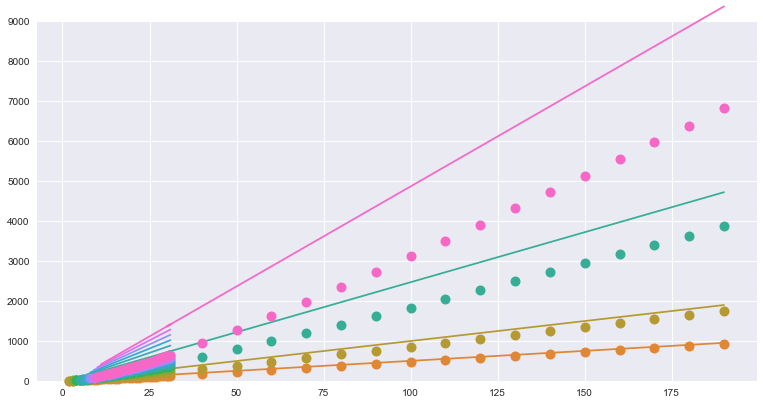

In [22]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylim([0, 9000])
theory_comp_plot(theory4, ax)

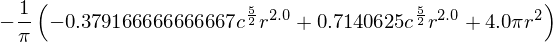

In [23]:
sympy.limit(sympy.series(S.subs({n:d-r}), d, x0=sympy.oo, n=1) - S2.removeO(), d, sympy.oo)

In [24]:
(-.38+.71)*15/2+4

In [25]:
def theory5(d, r):
    if d != r:
        v = 5*d*r-8*r**2
    else:
        v = np.nan
    return v

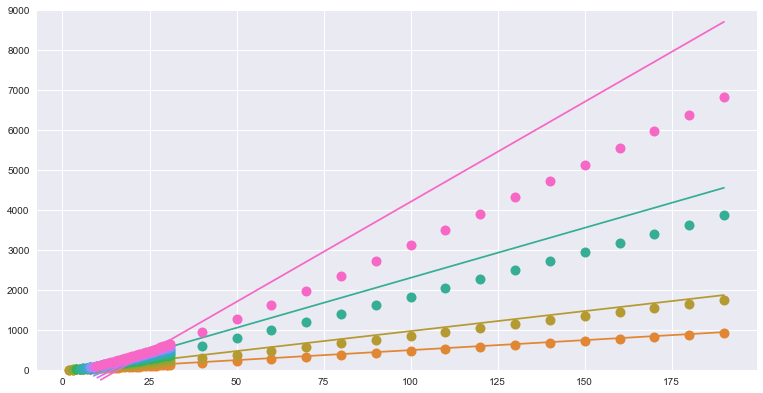

In [26]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_ylim([0, 9000])
theory_comp_plot(theory5, ax)


In total, we have

$$\boxed{\langle \lambda \rangle \approx 5rd - 8r^{2}}$$

Approximation II: $r = ad$
===============

Now, let's assume $r = ad$ for some $0 < a <1/2$. (Recall that our approximations start to break down once $r \sim d/2$.) In terms of $a$, the variable $x$ then takes the form

$$x = \left(\frac{15\pi a}{2(1-a)}\right)^{2/5}$$

Below, we plot $x$ as a function of $a$.

/Users/tlschol/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


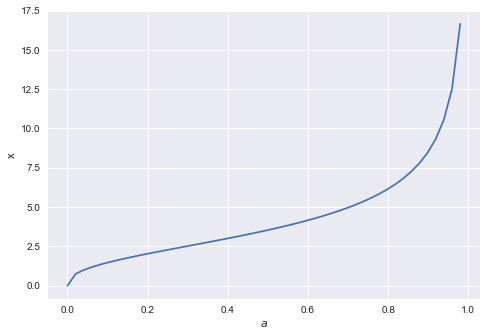

In [40]:
a = np.linspace(0, 1)

x = (15*np.pi*a/(2*(1-a)))**(2/5)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(a, x)
ax.set_xlabel('$a$')
ax.set_ylabel('x')

As expected, when $a \rightarrow 1$, $x$ diverges. (Of course, in that regime, $r \sim d$, and we know our approximation breaks down.) Eventually, we will consider the $a<<1$ regime. In that regime, we may approximate $x$ as

$$x\approx \left(\frac{15\pi}{2}\right)^{2/5}*(a(1+a))^{2/5}$$

Further, we'll want to linearize the radical:

$$x\approx \left(\frac{15\pi}{2}\right)^{2/5}*a^{2/5}(1+2a/5)$$

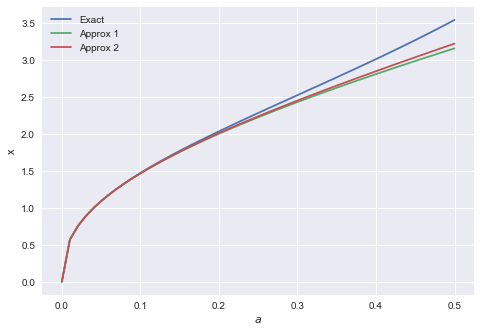

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

a = np.linspace(0, .5)
x = (15*np.pi*a/(2*(1-a)))**(2/5)
ax.plot(a, x, label='Exact')

x_approx = (15*np.pi*a/2)**(2/5)*(1+a)**(2/5)
ax.plot(a, x_approx, label='Approx 1')

x_approx = (15*np.pi*a/2)**(2/5)*(1+2*a/5)
ax.plot(a, x_approx, label='Approx 2')

ax.legend(loc=0)
ax.set_xlabel('$a$')
ax.set_ylabel('x')

Over our domain of interest $(0 < a < .5)$, the approximations work.

Next, we turn to approximating $g(x)$:

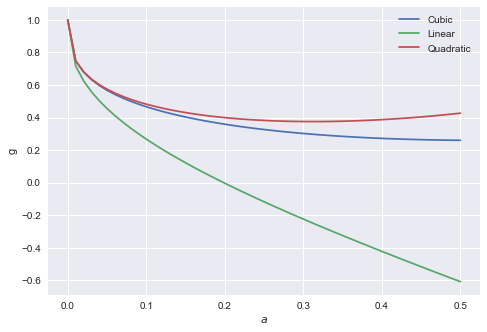

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

a = np.linspace(0, .5)

x = (15*np.pi*a/2)**(2/5)*(1+2*a/5)

g = 1-x/2 + x**2/10 - x**3/200
ax.plot(a, g, label='Cubic')

g_approx = 1-x/2
ax.plot(a, g_approx, label='Linear')

g_approx = 1-x/2 + x**2/10
ax.plot(a, g_approx, label='Quadratic')
ax.set_xlabel('$a$')
ax.set_ylabel('g')
ax.legend(loc=0)

Even after linearizing $x$, taking $g$ to be quadratic provides a good approximation.

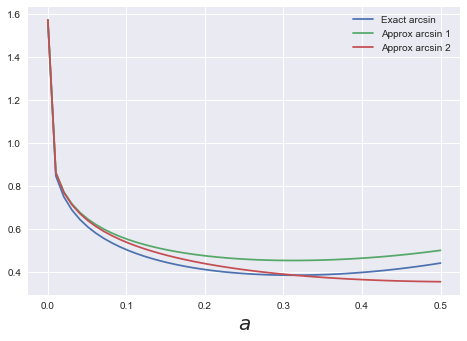

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

a = np.linspace(0, .5)
x = (15*np.pi*a/2)**(2/5)*(1+2*a/5)
g = 1-x/2 + x**2/10
ax.plot(a, np.arcsin(g), label='Exact arcsin')

y = x/2 - x**2/10
ax.plot(a,np.pi/2 - np.sqrt(2)*np.sqrt(y), label='Approx arcsin 1')

ax.plot(a,np.pi/2 - np.sqrt(x)*(1-x/10), label='Approx arcsin 2')

ax.legend(loc=0)
ax.set_xlabel('$a$', fontsize=20)

We can approximate the arcsin by its Taylor series, and things still hold up well across different values of $a$.

From these results, we have:

$$\begin{align*}
x &\approx \left(\frac{15\pi a}{2}\right)^{2/5}\left(1+\frac{2a}{5}\right)\\
g & \approx 1 -\frac{x}{2}+\frac{x^{2}}{10}\\
\sin^{-1}(g) &\approx \frac{\pi}{2} -\sqrt{x}\left(1-\frac{x}{10}\right)
\end{align*}$$

Therefore, our expression for $\langle \lambda \rangle$ is

$$\begin{align*}
\langle \lambda \rangle &\approx 2ad^{2}-a^{2}d^{2}+4d^{2}a(1-a)g^{2} + \frac{d^{2}(1-a)^{2}}{\pi}(1+4g^{2})\sqrt{x}\left(1-\frac{x}{10}\right)- \frac{gd^{2}(1-a)^{2}(2g+13)}{3\pi}\sqrt{1 - g^{2}}\\
&\approx 2ad^{2}-a^{2}d^{2}+4d^{2}a(1-a)\left(1 -\frac{x}{2}+\frac{x^{2}}{10}\right)^{2} + \frac{d^{2}(1-a)^{2}}{\pi}\left(1+4\left(1 -\frac{x}{2}+\frac{x^{2}}{10}\right)^{2}\right)\sqrt{x}\left(1-\frac{x}{10}\right)- \frac{\left(1 -\frac{x}{2}+\frac{x^{2}}{10}\right)d^{2}(1-a)^{2}(2\left(1 -\frac{x}{2}+\frac{x^{2}}{10}\right)+13)}{3\pi}\sqrt{1 - \left(1 -\frac{x}{2}+\frac{x^{2}}{10}\right)^{2}}\\
\end{align*}$$

Instead of wrestling with this horrible expression, let's jump right to assuming that only the first few terms matter.

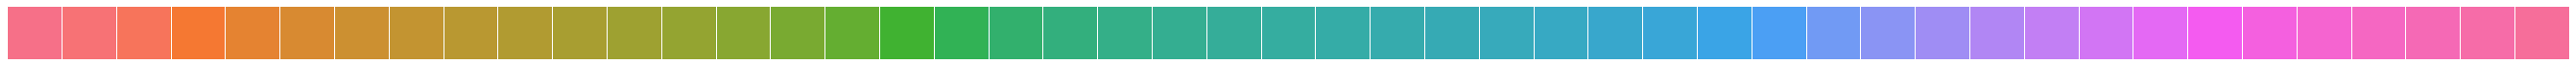

In [44]:
temp = df[df['rankTrue'] <= 4*df['dimRec']/4].copy()
temp.loc[:, 'a'] = temp.loc[:, 'rankTrue'] / temp.loc[:, 'dimRec']

dimRecs = temp['dimRec'].unique()

try:
    colors = sns.color_palette('husl', n_colors=len(dimRecs) + 1)
    sns.palplot(colors)
    
except Exception:
    colors = cm.viridis(np.linspace(0, 1, len(dimRecs) + 1))

In [56]:
def theory_comp_plot2(theory, ax):
    counter  = 1

    for d in dimRecs:
        X = temp[temp['dimRec'] == d]['a'].values
        Y = temp[temp['dimRec'] == d]['llrs'].values

        ax.plot(X, Y, clip_on=False, ls='', color=colors[counter],\
                marker='o', markersize=10 , alpha=1)

        Z = map(lambda a: theory(a, d), X)
        ax.plot(X, Z, clip_on=False, ls='-', color=colors[counter],\
                marker='')

        counter += 1
    
    plt.show()

In [57]:
def a_theory_0(a,d):
    x = (15 * np.pi * a/2)**(2/5)*(1+2*a/5)
    
    g = 1 - x/2 + x**2/10
    
    
    return 2*a*d**2 - a**2*d**2 + 4*d**2*a*(1-a)*g**2

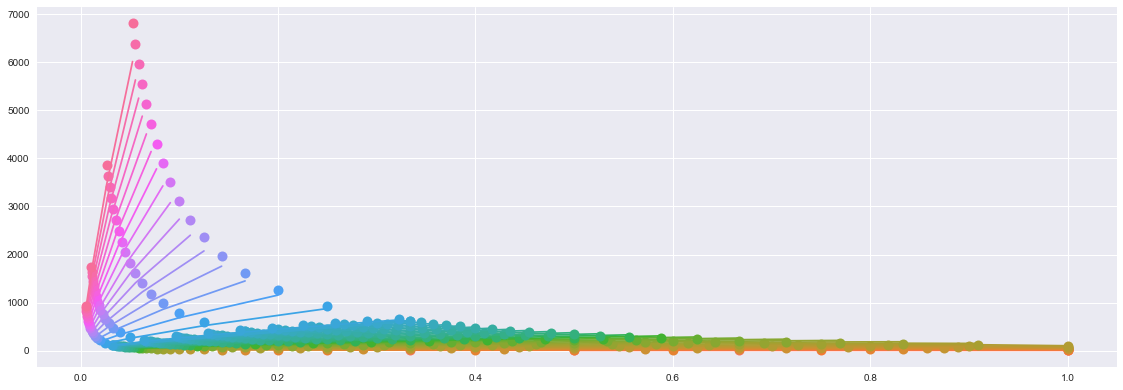

In [58]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
theory_comp_plot2(a_theory_0, ax)

Looks like taking

$$\langle \lambda \rangle \approx 2ad^{2}-a^{2}d^{2}+4d^{2}a(1-a)g^{2} = ad^{2}\left[2 -a+4(1-a)g^{2}\right]$$
works! Let's figure out a nice expression for $g^{2}$.

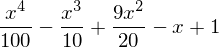

In [48]:
x = sympy.symbols('x')

g = 1-x/2+x**2/10

sympy.expand(g**2)

In [49]:
def a_theory_1(a,d):
    x = (15 * np.pi * a/2)**(2/5)*(1+2*a/5)
        
    return 2*a*d**2 - a**2*d**2 + 4*d**2*a*(1-a)*(1-x + 9*(x**2)/20- (x**3)/10 + (x**4)/100)

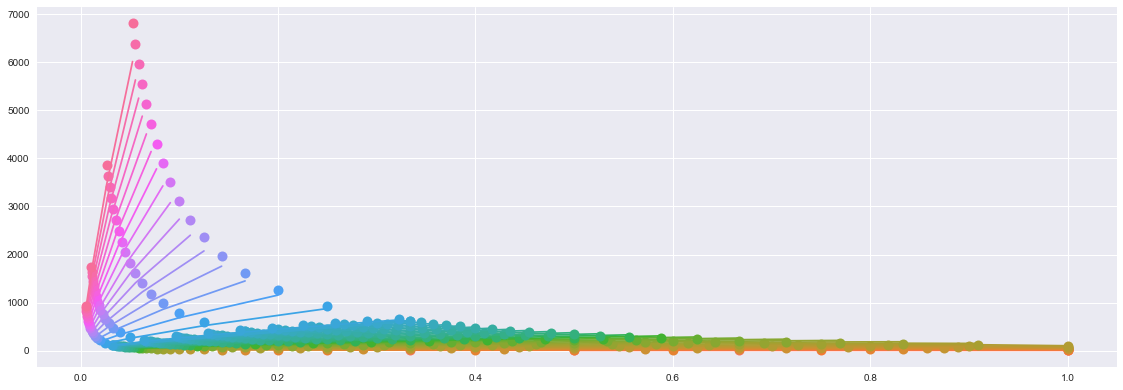

In [50]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
theory_comp_plot2(a_theory_1, ax)

Apparently you need to keep every term...

$$\langle \lambda \rangle \approx d^{2}\left[2a -a^{2}+4a(1-a)\left(1-x+\frac{9x^{2}}{20} - \frac{x^{3}}{10} + \frac{x^{4}}{100}\right)\right]$$

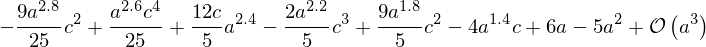

In [51]:
a,x,c,d=sympy.symbols('a,x,c,d')

l = 2*a-a**2+4*a*(1-a)*(1-x + 9*x**2/20 -x**3/10 +x**4/100)

S = sympy.series(l.subs({x: c*(a**(2/5))*(1+2*a/5)}), x=a, x0=0, n=3, dir='+')

sympy.init_printing(True)
S

In [52]:
print(sympy.latex(S))

- \frac{9 a^{2.8}}{25} c^{2} + \frac{a^{2.6} c^{4}}{25} + \frac{12 c}{5} a^{2.4} - \frac{2 a^{2.2}}{5} c^{3} + \frac{9 a^{1.8}}{5} c^{2} - 4 a^{1.4} c + 6 a - 5 a^{2} + \mathcal{O}\left(a^{3}\right)


In [53]:
sympy.init_printing(False)

In [54]:
def a_theory_2(a,d):
    c = (15*np.pi/2)**(2/5)
    multiplier = 6*a-5*a**2 - 4*a**1.4*c + 9*a**1.8/5*c**2 - 2*a**2.2/5*c**3\
            + 12*a**2.4/5*c + a**2.6*c**4/25 -9*a**2.8/25*c**2
        
    return (d**2)*multiplier

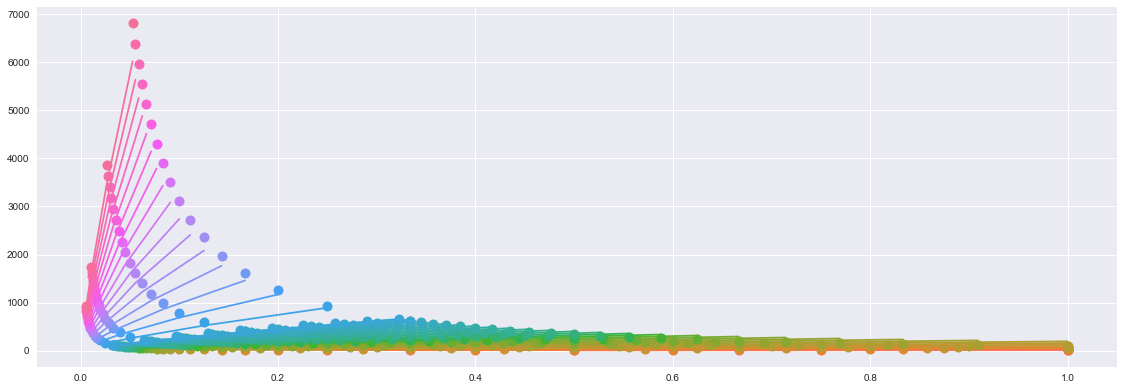

In [55]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
theory_comp_plot2(a_theory_2, ax)